In [2]:
import requests
from PIL import Image

In [5]:
KEY = "3093cf2f7b3a4ebba43b0d76a5501527"
ENDPOINT = "https://20220116sakurai.cognitiveservices.azure.com/"

In [6]:
assert KEY

In [8]:
face_api_url = ENDPOINT + 'face/v1.0/detect'

In [100]:
img_url = "qFI.jpg"
img = Image.open(img_url)

In [101]:
with open(img_url, "rb") as f:
    binary_img = f.read()

In [87]:
#binary_img

In [88]:
headers = {
    "Content-Type": "application/octet-stream",
    "Ocp-Apim-Subscription-Key": KEY
}

params = {
    "returnFaceId": "true",
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

In [89]:
res

<Response [200]>

In [98]:
result = res.json()
result[0]

{'faceId': 'ec2eef55-64c0-44c5-bc3e-2dc3ebeb9b80',
 'faceRectangle': {'top': 298, 'left': 641, 'width': 269, 'height': 269},
 'faceAttributes': {'smile': 0.823,
  'headPose': {'pitch': 1.5, 'roll': -25.2, 'yaw': -15.7},
  'gender': 'female',
  'age': 21.0,
  'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
  'glasses': 'NoGlasses',
  'emotion': {'anger': 0.0,
   'contempt': 0.001,
   'disgust': 0.0,
   'fear': 0.0,
   'happiness': 0.823,
   'neutral': 0.175,
   'sadness': 0.001,
   'surprise': 0.0},
  'blur': {'blurLevel': 'low', 'value': 0.16},
  'exposure': {'exposureLevel': 'goodExposure', 'value': 0.53},
  'noise': {'noiseLevel': 'low', 'value': 0.01},
  'makeup': {'eyeMakeup': True, 'lipMakeup': True},
  'accessories': [],
  'occlusion': {'foreheadOccluded': False,
   'eyeOccluded': False,
   'mouthOccluded': False},
  'hair': {'bald': 0.04,
   'invisible': False,
   'hairColor': [{'color': 'brown', 'confidence': 1.0},
    {'color': 'black', 'confidence': 0.78},
 

In [91]:
rect = result[0]['faceRectangle']

In [92]:
rect

{'top': 298, 'left': 641, 'width': 269, 'height': 269}

In [93]:
from PIL import ImageDraw

In [94]:
draw = ImageDraw.Draw(img)

In [95]:
#draw.line([(0,50), (500,50), (0, 150), (200,150)], fill="red", width=10)
#img

In [96]:
draw.rectangle([(rect["left"], rect["top"]),(rect["left"]+rect["width"], rect["top"]+rect["height"])], fill=None, outline="green", width=5)



In [102]:
#img

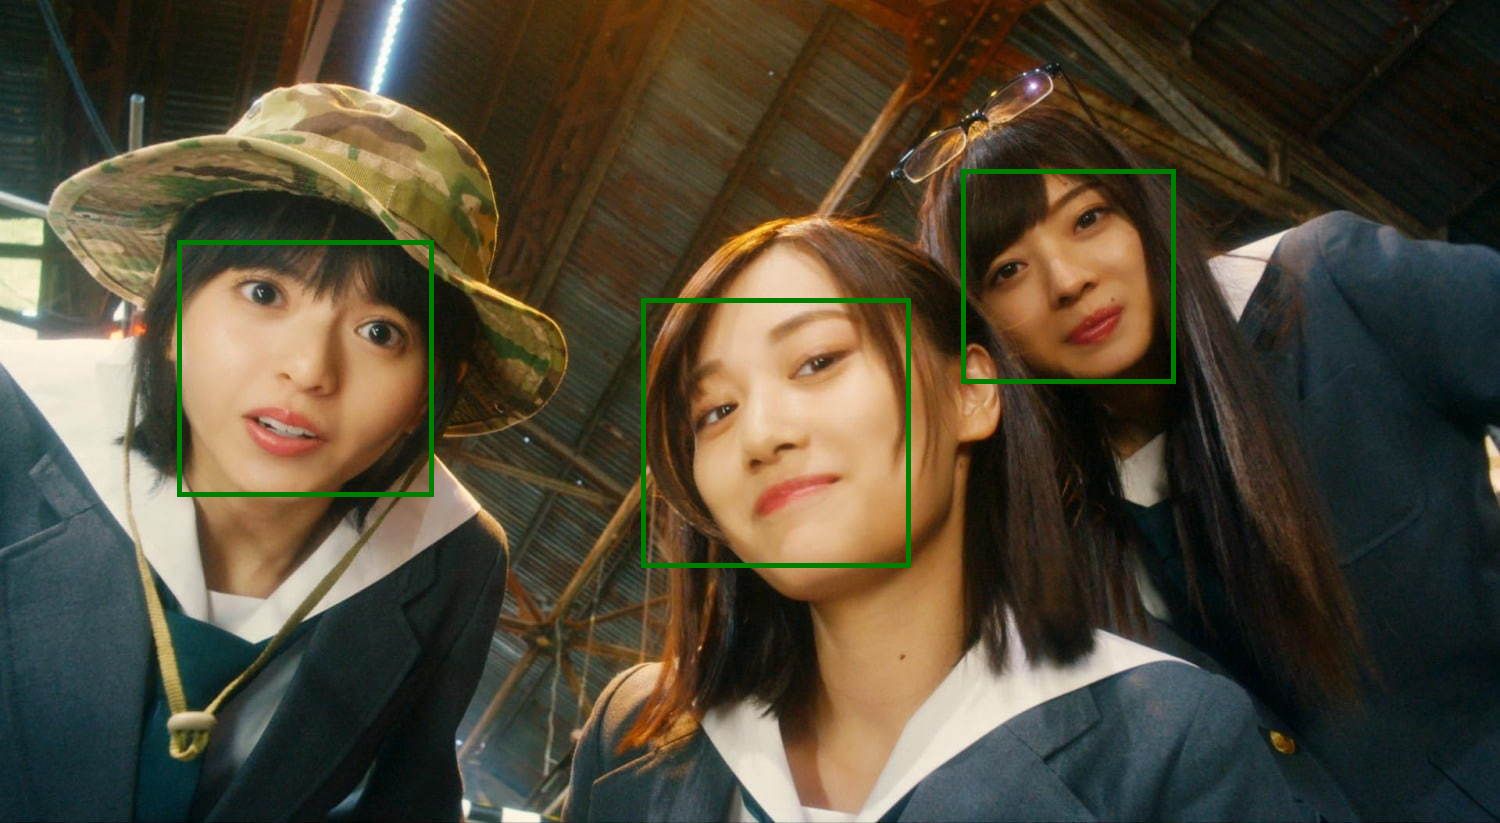

In [133]:
import requests
from PIL import Image
from PIL import ImageDraw

KEY = "3093cf2f7b3a4ebba43b0d76a5501527"
ENDPOINT = "https://20220116sakurai.cognitiveservices.azure.com/"

assert KEY

face_api_url = ENDPOINT + 'face/v1.0/detect'

img_url = "qFI.jpg"
img = Image.open(img_url)

with open(img_url, "rb") as f:
    binary_img = f.read()
    
headers = {
    "Content-Type": "application/octet-stream",
    "Ocp-Apim-Subscription-Key": KEY
}

params = {
    "returnFaceId": "true",
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)
results = res.json()

#rect = result[0]['faceRectangle']

draw = ImageDraw.Draw(img)

GENDER_JP = {
    "female": "女",
    "male" : "男"
}

for result in results:
    rect = result['faceRectangle']
    #text = GENDER_JP[result['faceAttributes']["gender"]]+ ":" + str(result['faceAttributes']["age"])
    draw.rectangle([(rect["left"], rect["top"]),(rect["left"]+rect["width"], rect["top"]+rect["height"])], fill=None, outline="green", width=5)
    #print(text)
    
img

In [122]:
results

[{'faceId': '3800d597-e05e-4340-9a2c-1560ec9c4c39',
  'faceRectangle': {'top': 298, 'left': 641, 'width': 269, 'height': 269},
  'faceAttributes': {'smile': 0.823,
   'headPose': {'pitch': 1.5, 'roll': -25.2, 'yaw': -15.7},
   'gender': 'female',
   'age': 21.0,
   'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.001,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.823,
    'neutral': 0.175,
    'sadness': 0.001,
    'surprise': 0.0},
   'blur': {'blurLevel': 'low', 'value': 0.16},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.53},
   'noise': {'noiseLevel': 'low', 'value': 0.01},
   'makeup': {'eyeMakeup': True, 'lipMakeup': True},
   'accessories': [],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.04,
    'invisible': False,
    'hairColor': [{'color': 'brown', 'confidence': 1.0},
     {'color': 'bl